In [18]:
import numpy as np
import os
#!pip install pandas_datareader
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


In [19]:
start = datetime(2010, 9, 1)
end = datetime(2018, 9, 1)
df = pd.read_csv('C:/Users/kunal/AI mini project/tesla.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


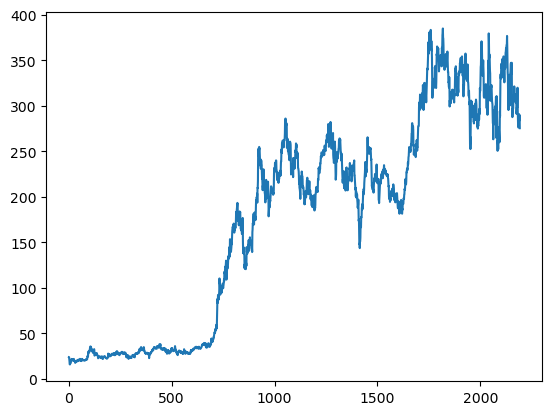

In [20]:
plt.plot(df.Close)

In [21]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2188    321.1557
2189    321.3934
2190    321.5171
2191    321.6989
2192    321.8141
Name: Close, Length: 2193, dtype: float64

In [22]:
ma200 = df.Close.rolling(100).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2188    321.1557
2189    321.3934
2190    321.5171
2191    321.6989
2192    321.8141
Name: Close, Length: 2193, dtype: float64

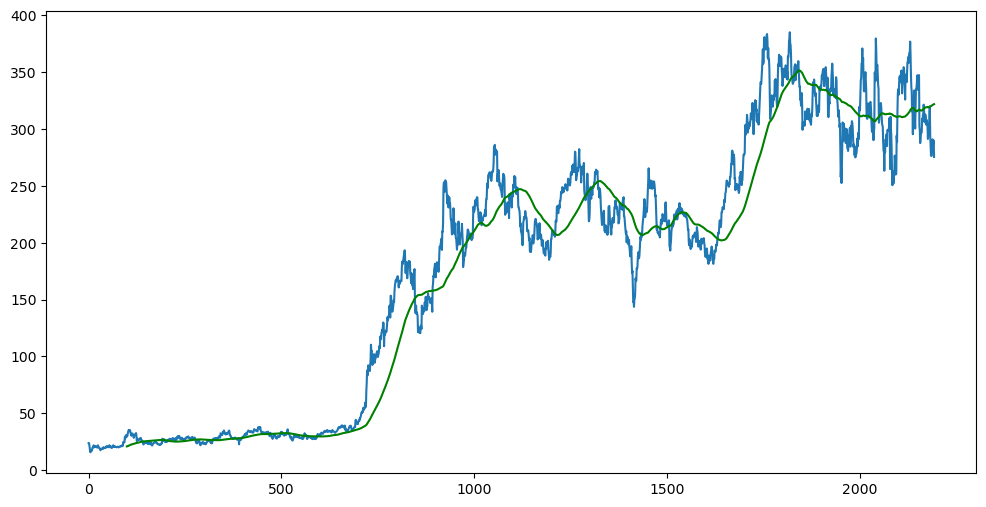

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)

plt.plot(ma200,'g')

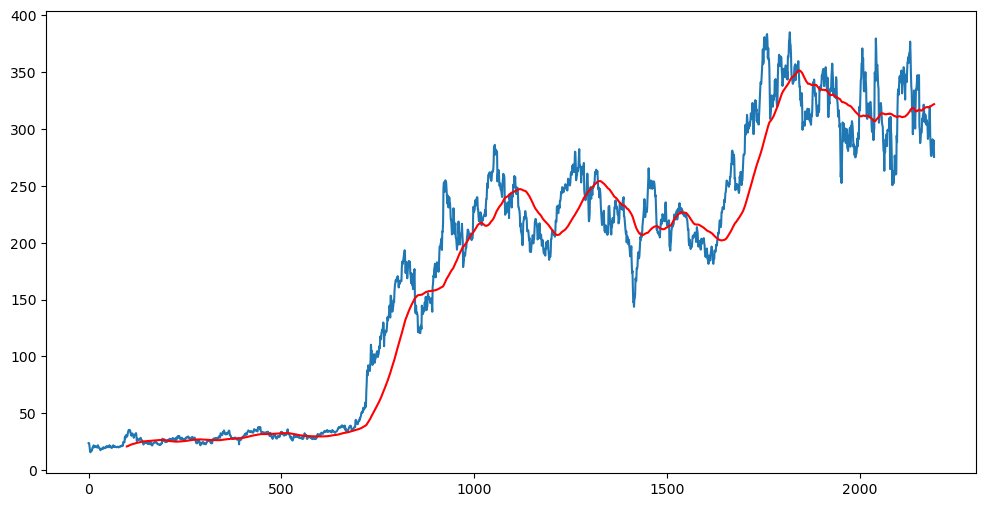

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')


In [25]:
df.shape


(2193, 7)

In [26]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1535, 1)
(658, 1)


In [27]:
data_training.head()


,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001
4,16.110001


In [28]:
data_testing.head()

,Close
1535,225.789993
1536,230.610001
1537,230.029999
1538,226.160004
1539,229.080002


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [30]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.81035371],
       [0.79266573],
       [0.78226758]])

In [31]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)    

In [32]:
data_training_array.shape

(1535, 1)

In [34]:
!pip install keras
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\kunal\\just\\anaconda3\\Lib\\site-packages\\tensorflow\\python\\framework\\versions.py'
Consider using the `--user` option or check the permissions.



In [35]:
from tensorflow import keras
from keras.layers import Dense ,Dropout, LSTM
from keras.models import Sequential

     -------------------------------------- 272.8/272.8 MB 5.6 MB/s eta 0:00:00
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
     ---------------------------------------- 1.5/1.5 MB 10.5 MB/s eta 0:00:00
  Using cached jax-0.4.8.tar.gz (1.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 4.1/4.1 MB

In [36]:
model=Sequential()
model.add(LSTM(units = 50, activation='relu',return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation='relu',return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu',return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu' ))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [38]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
45/45 [==============================] - 14s 176ms/step - loss: 0.0989
Epoch 2/50
45/45 [==============================] - 8s 169ms/step - loss: 0.0192
Epoch 3/50
45/45 [==============================] - 8s 170ms/step - loss: 0.0135
Epoch 4/50
45/45 [==============================] - 8s 172ms/step - loss: 0.0125
Epoch 5/50
45/45 [==============================] - 8s 169ms/step - loss: 0.0118
Epoch 6/50
45/45 [==============================] - 8s 175ms/step - loss: 0.0110
Epoch 7/50
45/45 [==============================] - 8s 171ms/step - loss: 0.0108
Epoch 8/50
45/45 [==============================] - 8s 169ms/step - loss: 0.0095
Epoch 9/50
45/45 [==============================] - 8s 171ms/step - loss: 0.0099
Epoch 10/50
45/45 [==============================] - 8s 171ms/step - loss: 0.0111
Epoch 11/50
45/45 [==============================] - 8s 171ms/step - loss: 0.0090
Epoch 12/50
45/45 [==============================] - 8s 171ms/step - loss: 0.0089
Epoch 13/50
45/45 [=====

In [39]:
model.save('keras_model.h5')

In [40]:
data_testing.head()

,Close
1535,225.789993
1536,230.610001
1537,230.029999
1538,226.160004
1539,229.080002


In [41]:
past_100_days = data_training.tail(100)

In [42]:
final_df = past_100_days.append(data_testing , ignore_index = True)

C:\Users\kunal\AppData\Local\Temp\ipykernel_9296\3207694217.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing , ignore_index = True)


In [43]:
final_df.head()

,Close
0,207.500000
1,215.149994
2,218.339996
3,221.929993
4,226.380005


In [44]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.27978397e-01],
       [1.65561270e-01],
       [1.81233105e-01],
       [1.98870034e-01],
       [2.20732043e-01],
       [2.51977437e-01],
       [2.79390858e-01],
       [2.59346633e-01],
       [2.02063397e-01],
       [2.27462551e-01],
       [2.39793649e-01],
       [2.39155035e-01],
       [2.23237540e-01],
       [2.37386422e-01],
       [2.75804462e-01],
       [3.21984805e-01],
       [3.63645310e-01],
       [4.12527707e-01],
       [3.72144504e-01],
       [3.37116232e-01],
       [3.36379268e-01],
       [3.26062437e-01],
       [3.59027271e-01],
       [3.45910110e-01],
       [3.58928995e-01],
       [3.55833981e-01],
       [3.23851619e-01],
       [3.36624923e-01],
       [3.28371383e-01],
       [3.55195293e-01],
       [3.45713628e-01],
       [3.55146190e-01],
       [3.43994119e-01],
       [3.25522029e-01],
       [2.91378026e-01],
       [2.96487375e-01],
       [2.49914071e-01],
       [2.01965121e-01],
       [1.47776967e-01],
       [1.64480450e-01],


In [45]:
input_data.shape

(758, 1)

In [46]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [47]:
x_test , y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)

print(y_test.shape)

(658, 100, 1)
(658,)


In [48]:
y_predicted = model.predict(x_test)

21/21 [==============================] - 2s 53ms/step


In [49]:
y_predicted.shape

(658, 1)

In [50]:
y_test

array([2.17833433e-01, 2.41513158e-01, 2.38663725e-01, 2.19651223e-01,
       2.33996582e-01, 2.17145647e-01, 2.13510225e-01, 2.16949169e-01,
       2.16850888e-01, 2.07123573e-01, 2.05305858e-01, 2.06632264e-01,
       2.13952357e-01, 2.03782832e-01, 2.13166290e-01, 2.02259874e-01,
       1.94104689e-01, 1.89339265e-01, 1.65806925e-01, 1.46843520e-01,
       1.50135090e-01, 9.49152872e-02, 8.02259973e-02, 1.05035641e-01,
       9.95333319e-02, 7.81626321e-02, 6.39646466e-02, 8.27806718e-02,
       7.17268769e-02, 7.34954890e-02, 9.31957785e-02, 1.17661492e-01,
       1.22279531e-01, 1.13927790e-01, 1.16777223e-01, 1.22721669e-01,
       1.27732742e-01, 1.35298490e-01, 1.19675758e-01, 1.21935675e-01,
       9.45713570e-02, 1.10930983e-01, 1.58437728e-01, 1.47187455e-01,
       1.32694717e-01, 9.60452111e-02, 7.44780338e-02, 9.57995564e-02,
       9.16237226e-02, 9.85507134e-02, 9.23115093e-02, 7.39867245e-02,
       6.14591492e-02, 8.67109248e-02, 1.08621964e-01, 8.67109248e-02,
      

In [51]:
y_predicted

array([[0.34182686],
       [0.34231097],
       [0.34277278],
       [0.34321767],
       [0.3436427 ],
       [0.34404552],
       [0.34442157],
       [0.34476677],
       [0.34510145],
       [0.3454363 ],
       [0.3457536 ],
       [0.34605837],
       [0.3463562 ],
       [0.34665856],
       [0.34696564],
       [0.3472848 ],
       [0.34756178],
       [0.34775287],
       [0.3479051 ],
       [0.34808242],
       [0.34829068],
       [0.34849775],
       [0.34870654],
       [0.34883165],
       [0.34890544],
       [0.34882456],
       [0.3484627 ],
       [0.34744507],
       [0.34524286],
       [0.3414684 ],
       [0.33551878],
       [0.32713825],
       [0.31611702],
       [0.30227545],
       [0.2860269 ],
       [0.26775426],
       [0.24836007],
       [0.22915946],
       [0.21117076],
       [0.19529584],
       [0.18201853],
       [0.17168392],
       [0.16430955],
       [0.1599049 ],
       [0.1583363 ],
       [0.15945692],
       [0.1630677 ],
       [0.168

In [52]:
scaler.scale_


array([0.0049128])

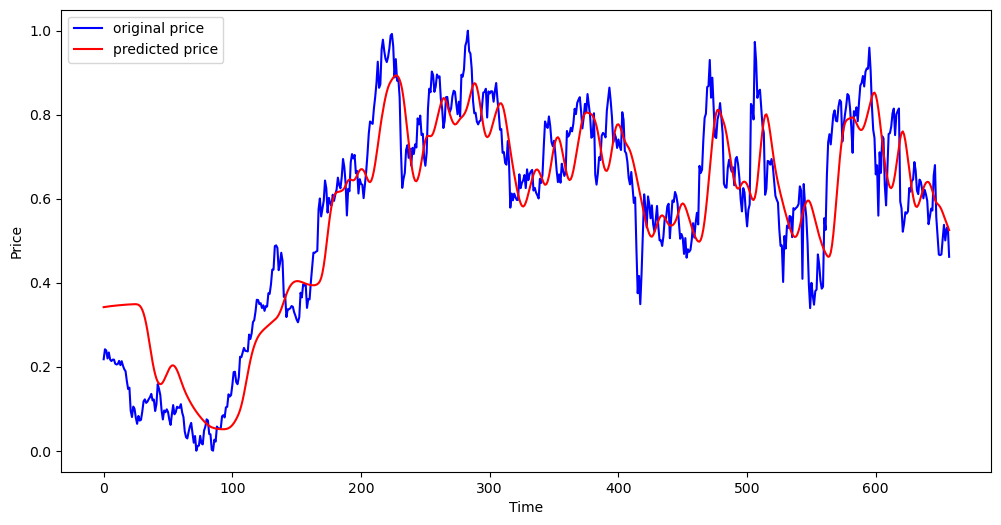

In [53]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b',label='original price')
plt.plot(y_predicted , 'r',label='predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()